In [1]:
import pandas as pd

import tqdm

In [2]:
import glob 

In [3]:
import matplotlib.pyplot as plt
import matplotlib

In [4]:
import matplotlib.colors as colors

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
import numpy as np

In [7]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

In [8]:
matplotlib.rc('font', **font)

**Clean data**

In [9]:
in_columns = ["y", "p", "q", "average cooperation rate", "average score", "t"]

**Clean based on $b$**

In [10]:
bs = range(1, 11)

In [31]:
csv_files = [f'../matlab/data/expected/clean_c_1_b_{b}_stochastic_0.csv' for b in bs]
csv_files_stoch = [f'../matlab/data/stochastic/clean_c_1_b_{b}_stochastic_1.csv' for b in bs]

In [32]:
import re

start = 'b_'
end = '_stochastic'

In [33]:
dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs.append(df)

In [34]:
plotting = dfs[1:5] + dfs[6:]

In [35]:
points_p = []
points_q = []

for df in plotting:
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p.append(ps)
    points_q.append(qs)

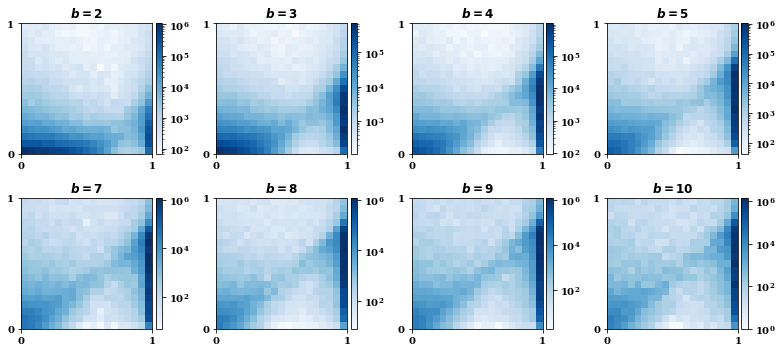

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(11, 5))

for i, points in enumerate(zip(points_p, points_q)):
    
    index = (int(i / 4), i % 4)

    heatmap, xedges, yedges = np.histogram2d(points[0], points[1], bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=matplotlib.cm.get_cmap("Blues"),
                            norm=colors.LogNorm(vmin=heatmap.min(),
                                                vmax=heatmap.max()))

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_title(f"$b={plotting[i]['b'].unique()[0]}$", weight="bold");
    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))

plt.tight_layout();

plt.savefig("../static/expected_for_beta.pdf", bbox_inches='tight')

In [38]:
dfs_stoch = []

for file in csv_files_stoch:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs_stoch.append(df)

In [39]:
plotting_stoch = dfs_stoch[1:5] + dfs_stoch[6:]

In [40]:
points_p_st = []
points_q_st = []

for df in plotting_stoch:
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p_st.append(ps)
    points_q_st.append(qs)

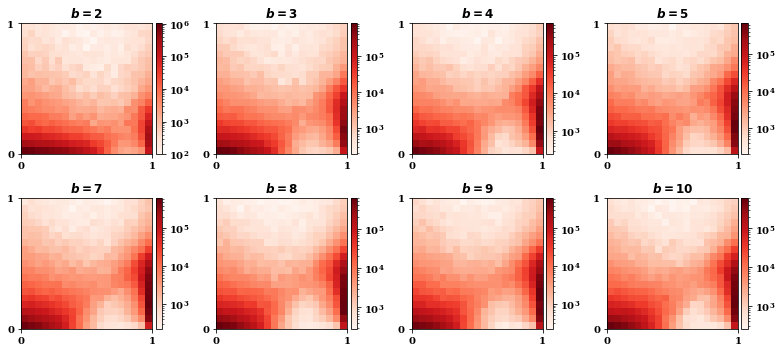

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(11, 5))

for i, points in enumerate(zip(points_p_st, points_q_st)):
    index = (int(i / 4), i % 4)

    heatmap, xedges, yedges = np.histogram2d(points[0], points[1], bins=19,)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, 
                            extent=extent,
                            origin="lower", 
                            cmap=matplotlib.cm.get_cmap("Reds"),
                             norm=colors.LogNorm(vmin=heatmap.min(),
                                                 vmax=heatmap.max()))
    
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    axes[index].set_title(f"$b={plotting_stoch[i]['b'].unique()[0]}$", weight="bold");
    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))

plt.tight_layout();

plt.savefig("../static/stochastic_for_beta.pdf", bbox_inches='tight')

In [45]:
cooperation_rates = []
cooperation_rates_expected = []

In [46]:
for df in dfs:
    cooperation_rates_expected.append(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)))

In [47]:
for df in dfs_stoch:
    cooperation_rates.append(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)))

In [48]:
reds = matplotlib.cm.get_cmap("Reds")
blues = matplotlib.cm.get_cmap("Blues")

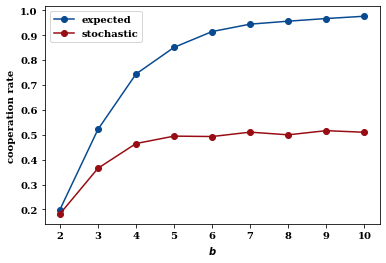

In [55]:
fig, axes = plt.subplots()

axes.plot(range(2, 11), cooperation_rates_expected[1:], "-o", color=blues(0.9), label="expected");
axes.plot(range(2, 11), cooperation_rates[1:], "-o", color=reds(.9), label="stochastic");

axes.set_ylabel('cooperation rate', weight="bold");
axes.set_xlabel('$b$', weight="bold");

plt.legend()
plt.savefig("../static/cooperation_rate_over_b.pdf", bbox_inches='tight')

**Clean based on $\beta$**

In [69]:
betas = [0.01, 0.1, 1, 10, 100]

In [70]:
csv_files = [f'../matlab/data/expected/clean_beta_{beta}_stochastic_0.csv' for beta in betas]

In [71]:
start = 'beta_'

In [72]:
dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs.append(df)

In [73]:
points_p = []
points_q = []

for df in dfs:
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p.append(ps)
    points_q.append(qs)

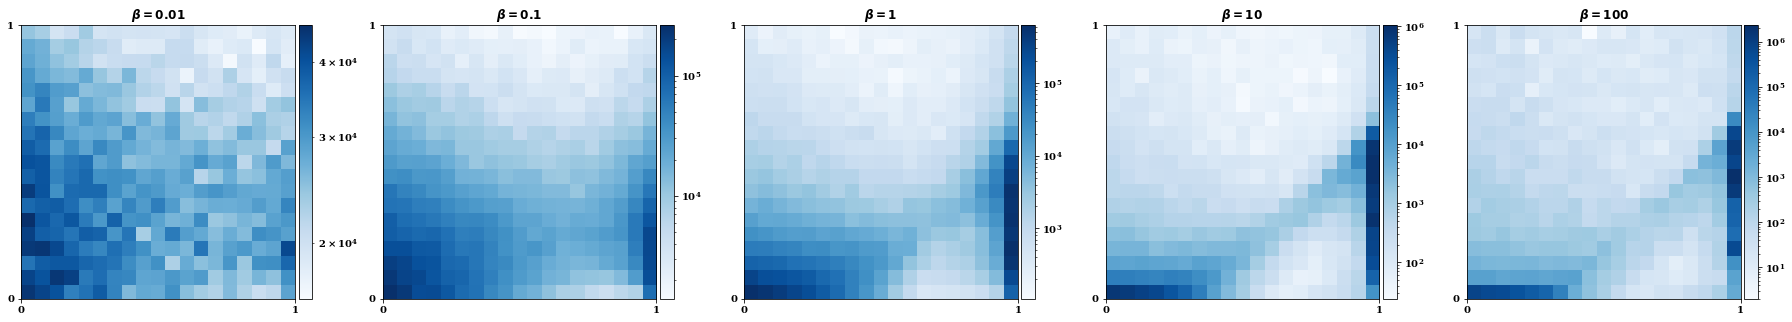

In [75]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 5))

for i, points in enumerate(zip(points_p, points_q)):

    heatmap, xedges, yedges = np.histogram2d(points[0], points[1], bins=19,)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[i].imshow(heatmap.T, extent=extent, origin="lower",
                        cmap=matplotlib.cm.get_cmap("Blues"),  norm=colors.LogNorm(vmin=heatmap.min(),
                                                                                    vmax=heatmap.max()))
    
    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    axes[i].set_title(fr"$\beta={dfs[i]['b'].unique()[0]}$", weight="bold");
    axes[i].set_xticks(np.linspace(0, 1, 2))
    axes[i].set_yticks(np.linspace(0, 1, 2))
plt.tight_layout()

plt.savefig("../static/expected_for_selection_strenght.pdf", bbox_inches='tight')

In [80]:
csv_files_stoch = [f'../matlab/data/stochastic/clean_beta_{b}_stochastic_1.csv' for b in betas]

In [81]:
dfs_stoch = []

for file in csv_files_stoch:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs_stoch.append(df)

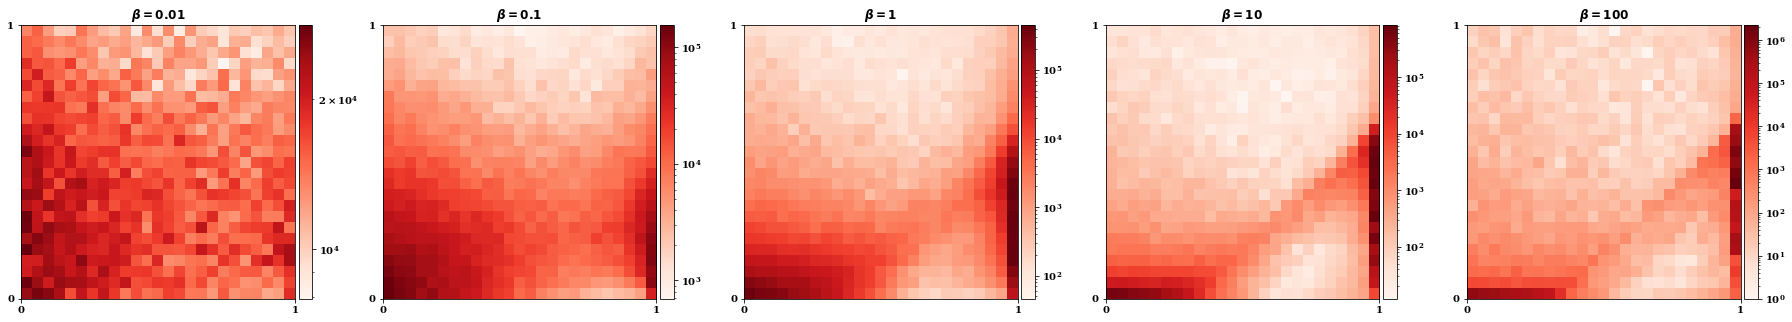

In [83]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 5))

for i, points in enumerate(zip(points_p, points_q)):

    heatmap, xedges, yedges = np.histogram2d(points[0], points[1], bins=25,)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[i].imshow(heatmap.T, extent=extent, origin="lower",
                        cmap=matplotlib.cm.get_cmap("Reds"),
                        norm=colors.LogNorm(vmin=heatmap.min(),
                                            vmax=heatmap.max()))
    
    
    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    axes[i].set_title(fr"$\beta={dfs_stoch[i]['b'].unique()[0]}$", weight="bold");
    axes[i].set_xticks(np.linspace(0, 1, 2))
    axes[i].set_yticks(np.linspace(0, 1, 2))
plt.tight_layout()

plt.savefig("../static/stochastic_for_selection_strenght.pdf", bbox_inches='tight')

In [97]:
cooperation_rates = []
cooperation_rates_expected = []

In [98]:
for df in dfs:
    cooperation_rates_expected.append(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)))

In [99]:
for df in dfs_stoch:
    cooperation_rates.append(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)))

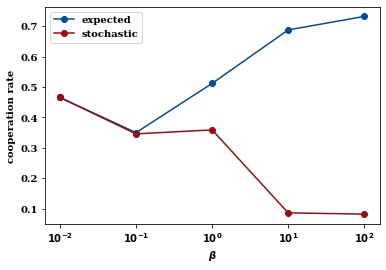

In [112]:
fig, axes = plt.subplots()

axes.plot(range(1, 6), cooperation_rates_expected, "-o", color=blues(0.9), label="expected");
axes.plot(range(1, 6), cooperation_rates, "-o", color=reds(0.9), label="stochastic");

axes.set_ylabel('cooperation rate', weight="bold");
axes.set_xlabel(r'$\beta$', weight="bold");

axes.set_xticks([1, 2, 3, 4, 5]);
axes.set_xticklabels([r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);

plt.legend();
plt.savefig("../static/cooperation_rate_over_betas.pdf", bbox_inches='tight')